In [1]:
!pip install quandl

# 1. Abrindo bibliotecas

In [1]:
import requests
import pandas as pd
import numpy as np
import pandas as pd
#Data Source
import yfinance as yf
#Data viz library
import plotly.graph_objs as go

Ajuda sobre FX: https://stackoverflow.com/questions/44604440/forex-historical-data-in-python

# 2. API da Fixer

Documentação: https://fixer.io/documentation

Latest

In [27]:
URL = "http://data.fixer.io/api/2013-03-16"
params = {'symbols':'USD, CAD, EUR',
'access_key':'66eee27bb006b18efacb2facb427f347'}

fixer = requests.get(URL, params=params)
fixer_df= pd.read_json(fixer.text)

In [ ]:
http://data.fixer.io/api?access_key=66eee27bb006b18efacb2facb427f347&symbols=USD,AUD,CAD,PLN,MXN&format=1

In [28]:
fixer_df.head()

success           timestamp  historical base       date     rates
CAD     True 2013-03-16 23:59:59        True  EUR 2013-03-16  1.333812
EUR     True 2013-03-16 23:59:59        True  EUR 2013-03-16  1.000000
USD     True 2013-03-16 23:59:59        True  EUR 2013-03-16  1.307716

In [46]:
URL = "http://data.fixer.io/api/latest"
params = {'symbols':'USD, CAD, EUR,BRL',
'access_key':'66eee27bb006b18efacb2facb427f347'}

latest = requests.get(URL, params=params)
latest_df = pd.read_json(latest.text)

In [47]:
latest_df.head()

success           timestamp base       date     rates
BRL     True 2021-05-14 21:06:04  EUR 2021-05-14  6.404369
CAD     True 2021-05-14 21:06:04  EUR 2021-05-14  1.470638
EUR     True 2021-05-14 21:06:04  EUR 2021-05-14  1.000000
USD     True 2021-05-14 21:06:04  EUR 2021-05-14  1.214650

# 3. API da FXMarket

Para consultar a documentação dessa API: https://fxmarketapi.com/documentation

In [78]:
# FX API

URL = "https://fxmarketapi.com/apipandas"
params = {'currency' : 'USDBRL',
'start_date' : '2019-01-01',
'end_date':'2021-05-17',
'api_key':'ogethP_V5yBm7qkObsLV'}

response = requests.get("https://fxmarketapi.com/apipandas", params=params)
df= pd.read_json(response.text)

In [79]:
df.head()

open     high      low    close
2019-01-01  3.88112  3.88198  3.88077  3.88097
2019-01-02  3.88097  3.88932  3.78732  3.79011
2019-01-03  3.79028  3.80213  3.74026  3.75568
2019-01-04  3.75569  3.78343  3.71040  3.71480
2019-01-07  3.71561  3.73611  3.69220  3.73591

<AxesSubplot:>

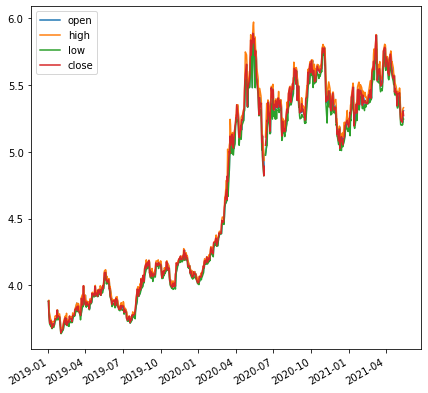

In [80]:
df.plot(figsize=(7,7))

Listando os pares disponíveis

In [20]:
apis_available = requests.get("https://fxmarketapi.com/apicurrencies", params=params)
APIs= pd.read_json(apis_available.text)

In [21]:
APIs

currencies
BTCUSD                      Bitcoin
USDAED  United Arab Emirates Dirham
USDARS               Argentine Peso
USDAUD            Australian Dollar
USDBRL               Brazilian Real
USDCAD              Canadian Dollar
USDCHF                  Swiss Franc
USDCLP                 Chilean Peso
USDCNY                 Chinese Yuan
USDCOP               Colombian Peso
USDCZK                 Czech Koruna
USDDKK                 Danish Krone
USDEUR                         Euro
USDGBP       British Pound Sterling
USDHKD             Hong Kong Dollar
USDHRK                Croatian Kuna
USDHUF             Hungarian Forint
USDIDR            Indonesian Rupiah
USDILS               Israeli Sheqel
USDINR                 Indian Rupee
USDISK              Icelandic Krona
USDJPY                 Japanese Yen
USDKRW             South Korean Won
USDKWD                Kuwaiti Dinar
USDMAD              Moroccan Dirham
USDMXN                 Mexican Peso
USDMYR            Malaysian Ringgit
USDNOK              Norwegian Krone
USDNZD           New Zealand Dollar
USDPEN           Peruvian Nuevo Sol
USDPHP              Philippine Peso
USDPLN                 Polish Zloty
USDRON                 Romanian Leu
USDRUB                Russian Ruble
USDSEK                Swedish Krona
USDSGD             Singapore Dollar
USDTHB                    Thai Baht
USDTRY                 Turkish Lira
USDTWD             Taiwanese Dollar
USDXAG               Silver (ounce)
USDXAU                 Gold (ounce)
USDZAR           South African Rand

## Dados em tempo real

Note que o 'timestap', isso é, o registro de tempo, vem no horário UTC

In [2]:
URL = "https://fxmarketapi.com/apilive"
params = {'api_key':'ogethP_V5yBm7qkObsLV',
         'currency':'EURBRL,GBPUSD,USDJPY,AUDUSD'}

live_feed = requests.get(URL, params=params)
live= pd.read_json(live_feed.text)

In [3]:
live

price           timestamp
AUDUSD    0.77579 2021-05-17 01:18:25
EURBRL    6.39588 2021-05-17 01:18:25
GBPUSD    1.40851 2021-05-17 01:18:25
USDJPY  109.39150 2021-05-17 01:18:25

## Dados de negociação por hora

In [4]:
URL = "https://fxmarketapi.com/apihistorical"
params = {'currency' : 'USDBRL',
'date' : '2021-05-11-11:00',
'interval':'minute',
'api_key':'ogethP_V5yBm7qkObsLV'}

hourly_feed = requests.get(URL, params=params)
hourly = pd.read_json(hourly_feed.text)

In [5]:
hourly.head()

date    price
USDBRL 2021-05-11 11:00:00  5.22458

# 4. Via Yahoo Finance

In [6]:
#Download USDBRL data
data = yf.download(tickers = 'USDBRL=X' ,period ='60d', interval = '15m')

#declare figure
fig = go.Figure()

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

Open    High     Low   Close  Adj Close  Volume
Datetime                                                                    
2021-02-23 00:00:00+00:00  5.4625  5.4625  5.4625  5.4625     5.4625       0
2021-02-23 00:15:00+00:00  5.4625  5.4625  5.4625  5.4625     5.4625       0
2021-02-23 00:30:00+00:00  5.4625  5.4625  5.4625  5.4625     5.4625       0
2021-02-23 01:00:00+00:00  5.4654  5.4654  5.4654  5.4654     5.4654       0
2021-02-23 02:45:00+00:00  5.4654  5.4654  5.4654  5.4654     5.4654       0

In [7]:
#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title=' US Dolar vs. Brazilian Real')

#Show
fig.show()

# 5. Biblioteca forex_python

Até onde estudei essa bilblioteca, ela não possui nenhuma forma de obtenção de dados históricos de negociação de moedas, a única forma seria obter os rates atuais e ir salvando isso num loop

In [ ]:
# Instalando
!pip install forex_python

In [66]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [67]:
c.get_rates('USD')

{'GBP': 0.7100800132,
 'HKD': 7.766311969,
 'IDR': 14296.749979378,
 'ILS': 3.2794687784,
 'DKK': 6.1339602409,
 'INR': 73.2549698919,
 'CHF': 0.9034067475,
 'MXN': 19.816217108,
 'CZK': 21.0277983997,
 'SGD': 1.3330858698,
 'THB': 31.3552750969,
 'HRK': 6.2022601666,
 'EUR': 0.8248783304,
 'MYR': 4.1254639941,
 'NOK': 8.2548874041,
 'CNY': 6.4360306855,
 'BGN': 1.6132970387,
 'PHP': 47.7332343479,
 'PLN': 3.7299348346,
 'ZAR': 14.082487833,
 'CAD': 1.2125711458,
 'ISK': 124.4741400643,
 'BRL': 5.2744370205,
 'RON': 4.0632681679,
 'NZD': 1.383403448,
 'TRY': 8.4281118535,
 'JPY': 109.2881300008,
 'RUB': 73.9269157799,
 'KRW': 1128.4912975336,
 'USD': 1.0,
 'AUD': 1.2896147818,
 'HUF': 293.2607440403,
 'SEK': 8.3531304133}

In [81]:
!pip install investpy

  Created wheel for investpy: filename=investpy-1.0.6-py3-none-any.whl size=4485155 sha256=06f9582154a8a292204c9d3b6219809019dbc478cd3ef5fcb9a7532e7ff5867e
  Stored in directory: c:\users\victo\appdata\local\pip\cache\wheels\f3\20\5c\85b67973284ab4ffcb965ab3d86b48c7fb9760eb281d5bb0a3
Successfully built investpy


ERR#0095: products filtering parameter possible values are: "indices, stocks, etfs, funds, commodities, currencies, cryptos, bonds, certificates, fxfutures".

# Biblioteca investpy

Com essa biblioteca é possível capturar virtualmente qualquer ativo do mundo que esteja listado na página Investing.com dentro da seguinte lista:

* indices
* stocks
* etfs
* funds
* commodities
* currencies
* cryptos
* bonds
* certificates
* fxfutures

Como utilizar?
Consulte a documentação em: https://investpy.readthedocs.io/index.html

A forma mais fácil de usar essa biblioteca é quando você conhece o ativo alvo que deseja buscar

In [10]:
import investpy

<AxesSubplot:xlabel='Date'>

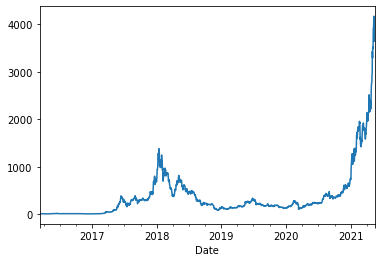

In [12]:
data = investpy.get_crypto_historical_data(crypto='ethereum',
                                           from_date='01/01/2014',
                                           to_date='15/05/2021')

#data.head()

data['Close'].plot()

Por exemplo, para ETFs

Temos duas funções principais:
    
    investpy.get_etf_recent_data()
    
    investpy.get_etf_historical_data()
    

In [13]:
bova11 = investpy.get_etf_historical_data(etf='Ishares Ibovespa', country = 'brazil',from_date='01/01/2010',to_date='15/05/2021')

<AxesSubplot:xlabel='Date'>

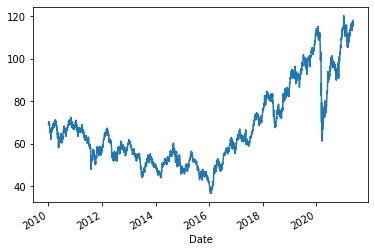

In [14]:
bova11['Close'].plot()

In [16]:
gold = investpy.get_etf_historical_data(etf='SPDR Gold Shares', country = 'united states',from_date='01/01/2010',to_date='15/05/2021')

<AxesSubplot:xlabel='Date'>

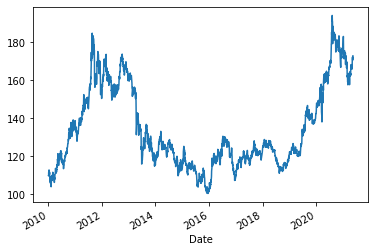

In [17]:
gold['Close'].plot()

Para recuperar commodities por exemplo, temos a função get_commodities

https://investpy.readthedocs.io/_api/commodities.html?highlight=commodities#investpy.commodities.get_commodities

Quando você não conhece o símbolo do ativo que quer buscar, a melhor forma é fazer através da função de busca

In [22]:
search_results = investpy.search_quotes(text='ewz', products=['etfs'],countries=['united states'],n_results=10)

In [25]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 509, "name": "iShares MSCI Brazil ETF", "symbol": "EWZ", "country": "united states", "tag": "/etfs/ishares-brazil-index", "pair_type": "etfs", "exchange": "NYSE"}


In [26]:
ewz = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

In [27]:
ewz.head()

Open   High    Low  Close    Volume
Date                                            
2019-01-02  38.94  40.78  38.86  40.64  41926748
2019-01-03  41.00  41.04  40.42  40.90  24851676
2019-01-04  40.88  42.10  40.65  41.82  40899788
2019-01-07  41.95  41.99  41.22  41.40  26407706
2019-01-08  41.59  41.97  41.29  41.90  23524788

<AxesSubplot:xlabel='Date'>

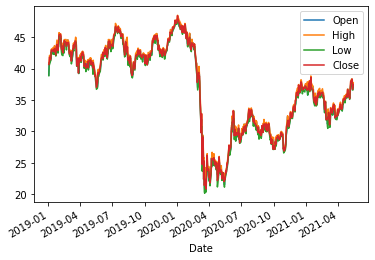

In [28]:
ewz.iloc[:,:4].plot()

# Commodities

Contratos em aberto de mercado futuro: http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-de-derivativos/contratos-em-aberto/vencimento-serie/contratos-em-aberto-futuro/

Como referência, utilizar o site da Investing.com
https://www.investing.com/commodities/ethanol-futures?cid=964525

Produtos de commodities da B3: http://www.b3.com.br/pt_br/solucoes/plataformas/puma-trading-system/para-participantes-e-traders/horario-de-negociacao/derivativos/commodities/

## Soja

Disclaimer:
    
O contrato americano de soja da CBOT tem mais liquidez

Sobre a CBOT: https://www.cmegroup.com/company/cbot.html#

Sobre o contrato: https://www.cmegroup.com/trading/agricultural/grain-and-oilseed/soybean_quotes_globex.html#

Definições sobre os contratos de soja: https://www.operefuturos.com.br/contratos-futuros-bmf/contratos-futuros-especificacoes/soja/

Esse produto é uma parceria entre CME e B3 para negociar soja, tipo ele negocia o contrato futuro de soja aqui mas o preço para liquidação é o SJC da CME

Futuro de Soja com Liquidação Financeira pelo Preço do Contrato Futuro Mini de Soja do CME Group (SJC)



In [29]:
search_results = investpy.search_quotes(text='soy',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)

In [30]:
for search_result in search_results[:10]:
    print(search_result)
    soja = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": "brazil", "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


<AxesSubplot:xlabel='Date'>

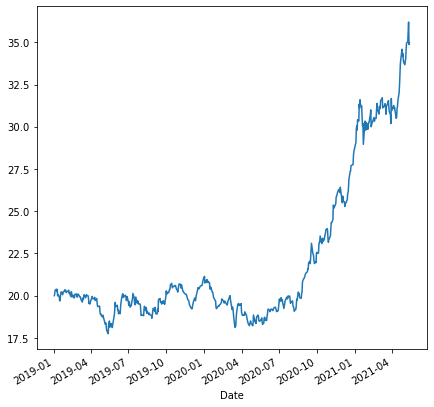

In [31]:
soja['Close'].plot(figsize=(7,7))

## Soja americana

{"id_": 8916, "name": "US Soybeans Futures", "symbol": "ZS", "country": "united states", "tag": "/commodities/us-soybeans", "pair_type": "commodities", "exchange": ""}


<AxesSubplot:xlabel='Date'>

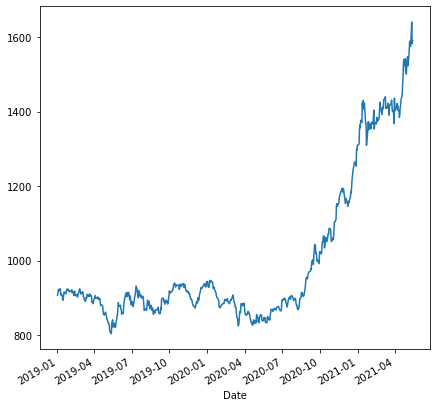

In [223]:
search_results = investpy.search_quotes(text='soy',
                                        products=['commodities'],
                                        countries=['united states'],
                                        n_results=10)

for search_result in search_results[1:2]:
    print(search_result)
    sojaUS = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')
    
sojaUS['Close'].plot(figsize=(7,7))

# Café brasileiro

In [163]:
search_results = investpy.search_quotes(text='coffee',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)

In [164]:
for search_result in search_results[:1]:
    print(search_result)
    coffee = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": "brazil", "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


<AxesSubplot:xlabel='Date'>

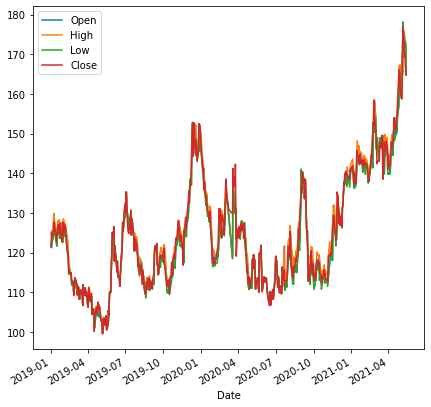

In [165]:
coffee.plot(figsize=(7,7))

## Café americano

In [106]:
search_results = investpy.search_quotes(text='coffee',
                                        products=['commodities'],
                                        countries=['united states'],
                                        n_results=10)

In [102]:
for search_result in search_results[:1]:
    print(search_result)
    coffee = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2020')

{"id_": 8832, "name": "US Coffee C Futures", "symbol": "KC", "country": "united states", "tag": "/commodities/us-coffee-c", "pair_type": "commodities", "exchange": "ICE"}


<AxesSubplot:xlabel='Date'>

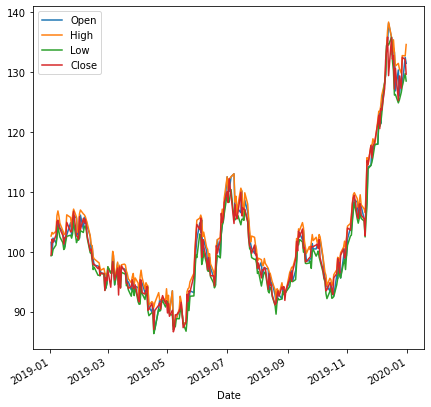

In [111]:
coffee.plot(figsize=(7,7))

## Milho US

In [119]:
search_results = investpy.search_quotes(text='corn',
                                        products=['commodities'],
                                        countries=['united states'],
                                        n_results=10)

In [120]:
for search_result in search_results[:1]:
    print(search_result)
    corn = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 8918, "name": "US Corn Futures", "symbol": "ZC", "country": "united states", "tag": "/commodities/us-corn", "pair_type": "commodities", "exchange": ""}


<AxesSubplot:xlabel='Date'>

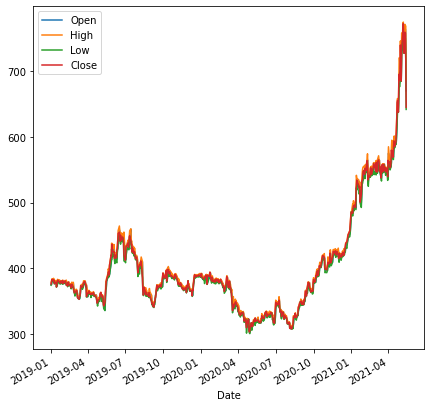

In [121]:
corn.plot(figsize=(7,7))

## Milho BR

In [122]:
search_results = investpy.search_quotes(text='corn',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)


In [123]:
for search_result in search_results[:1]:
    print(search_result)
    corn = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 964522, "name": "US Corn Futures", "symbol": "CCMc1", "country": "brazil", "tag": "/commodities/us-corn?cid=964522", "pair_type": "commodities", "exchange": "BM&FBovespa"}


<AxesSubplot:xlabel='Date'>

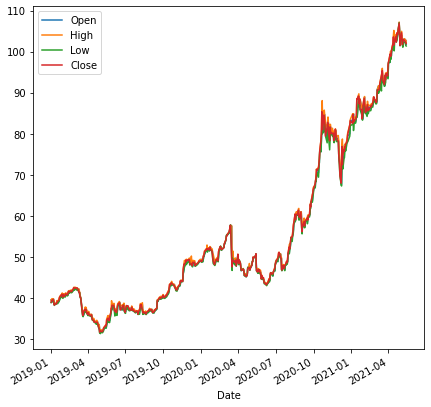

In [124]:
corn.plot(figsize=(7,7))

## Boi Gordo

In [135]:
search_results = investpy.search_quotes(text='cattle',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)

In [136]:
for search_result in search_results[:1]:
    print(search_result)
    boigordo = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": "brazil", "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}


<AxesSubplot:xlabel='Date'>

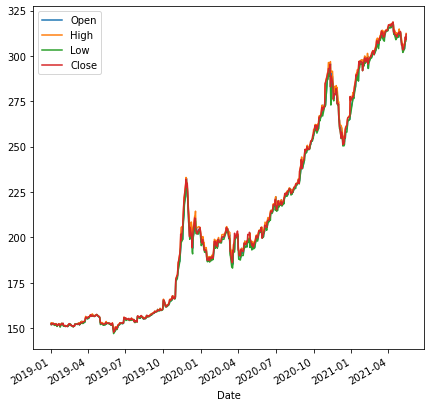

In [137]:
boigordo.plot(figsize=(7,7))

## Etanol

In [193]:
search_results = investpy.search_quotes(text='ethanol',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)

In [194]:
for search_result in search_results[:1]:
    print(search_result)
    etanol = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": "brazil", "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [196]:
etanol

Open    High     Low   Close
Date                                      
2019-01-02  1730.0  1730.0  1730.0  1730.0
2019-01-03  1730.0  1730.0  1730.0  1730.0
2019-01-04  1730.0  1730.0  1730.0  1730.0
2019-01-07  1730.0  1730.0  1730.0  1730.0
2019-01-08  1680.0  1680.0  1675.0  1690.0
...            ...     ...     ...     ...
2021-05-10  2900.0  2960.0  2900.0  2960.0
2021-05-11  2950.0  3000.0  2950.0  2950.0
2021-05-12  3010.0  3010.0  2990.0  2998.5
2021-05-13  2970.0  2970.0  2950.0  2975.0
2021-05-14  2960.0  2960.0  2960.0  2975.0

[454 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

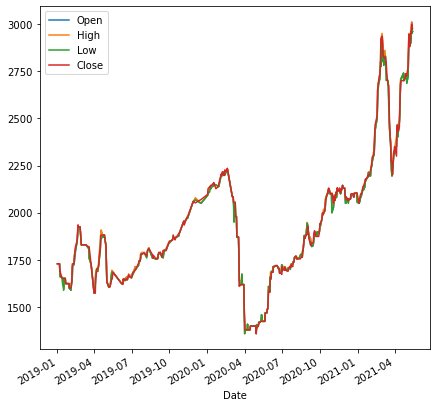

In [198]:
etanol.plot(figsize=(7,7))   

## Lumber US

In [157]:
search_results = investpy.search_quotes(text='lumber futures',
                                        products=['commodities'],
                                        countries=['united states'],
                                        n_results=10)

In [158]:
for search_result in search_results[:3]:
    print(search_result)
    lumber = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 959198, "name": "Lumber Futures", "symbol": "LB", "country": "united states", "tag": "/commodities/lumber", "pair_type": "commodities", "exchange": ""}


<AxesSubplot:xlabel='Date'>

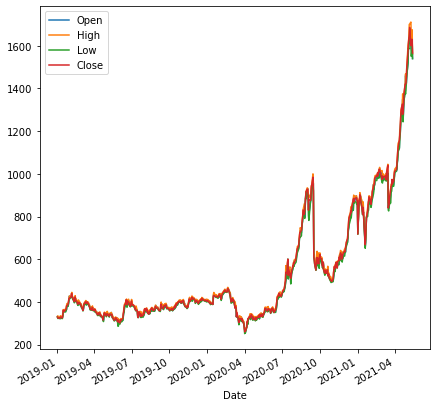

In [159]:
lumber.plot(figsize=(7,7))   

## Petróleo WTI

Diferença entre Brent e WTI: https://www.moneytimes.com.br/brent-e-wti-entenda-as-diferencas-de-cotacoes-e-como-afetam-a-petrobras/

In [210]:
search_results = investpy.search_quotes(text='crude oil',
                                        products=['commodities'],
                                        countries=['united states'],
                                        n_results=10)

In [211]:
for search_result in search_results[:1]:
    print(search_result)
    oil = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 8849, "name": "Crude Oil WTI Futures", "symbol": "T", "country": "united states", "tag": "/commodities/crude-oil", "pair_type": "commodities", "exchange": "ICE"}


<AxesSubplot:xlabel='Date'>

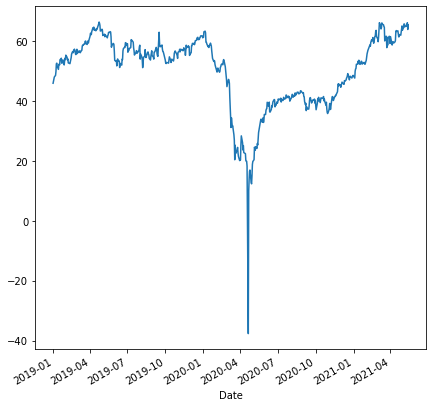

In [212]:
oil['Close'].plot(figsize=(7,7)) 

## Ouro BR

O que diz a B3 sobre contratos de ouro?
http://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/commodities/ficha-do-produto-8AE490CA6D41D4C7016D45F3CB49391D.htm

In [330]:
search_results = investpy.search_quotes(text='gold',
                                        products=['commodities'],
                                        countries=['brazil'],
                                        n_results=10)

In [332]:
for search_result in search_results[1:2]:
    print(search_result)

{"id_": 1161772, "name": "BM&F Brazil 250 Grams Gold Spot", "symbol": "BOR=FB", "country": "brazil", "tag": "/commodities/bm-f-brazil-250-grams-gold-futures", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [333]:
ouroBR = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

<AxesSubplot:xlabel='Date'>

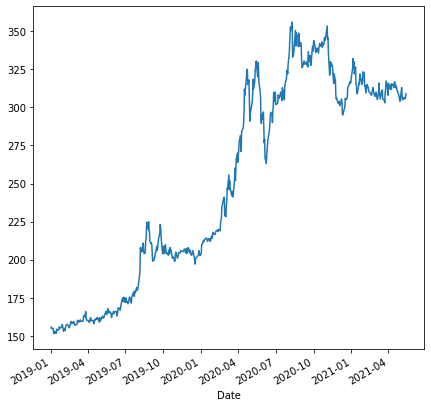

In [334]:
ouroBR['Close'].plot(figsize=(7,7))

## Ouro US

In [347]:
goldUS = investpy.commodities.get_commodity_historical_data(commodity='gold', from_date='01/01/2018', to_date='15/05/2021')

<AxesSubplot:xlabel='Date'>

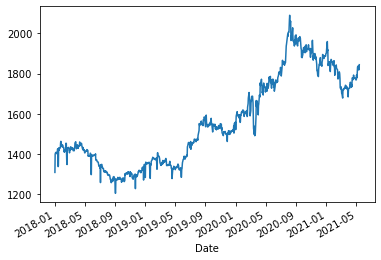

In [348]:
goldUS['Close'].plot()

In [357]:
search_results = investpy.search_quotes(text='gold',
                                        products=['commodities'],
                                        #countries=['united states'],
                                        n_results=70)

In [358]:
for search_result in search_results[:70]:
    print(search_result)

{"id_": 49779, "name": "Gold Petal Futures", "symbol": "MGPLK1", "country": "india", "tag": "/commodities/gold-petal", "pair_type": "commodities", "exchange": "MCX"}
{"id_": 49778, "name": "Gold Mini Futures", "symbol": "MMIM1", "country": "india", "tag": "/commodities/gold-mini", "pair_type": "commodities", "exchange": "MCX"}
{"id_": 49777, "name": "Gold Guinea Futures", "symbol": "MAXK1", "country": "india", "tag": "/commodities/gold-guinea", "pair_type": "commodities", "exchange": "MCX"}
{"id_": 996706, "name": "Gold Bullion Futures", "symbol": "XAU-B-TH", "country": "thailand", "tag": "/commodities/gold-bullion", "pair_type": "commodities", "exchange": "Thailand"}
{"id_": 996707, "name": "Gold fabricated Futures", "symbol": "XAU-F-TH", "country": "thailand", "tag": "/commodities/gold-fabricated", "pair_type": "commodities", "exchange": "Thailand"}
{"id_": 49776, "name": "Refined Gold Futures", "symbol": "MAUM1", "country": "india", "tag": "/commodities/refined-gold?cid=49776", "pai

In [359]:
silverUS = investpy.commodities.get_commodity_historical_data(commodity='silver', from_date='01/01/2018', to_date='15/05/2021')

<AxesSubplot:xlabel='Date'>

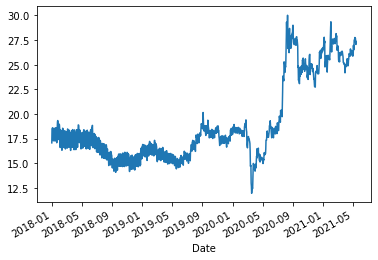

In [360]:
silverUS['Close'].plot()

## Silver ETFs

In [368]:
silver_etf = investpy.get_etf_historical_data(etf='silver', country = 'united states',from_date='01/01/2010',to_date='15/05/2021')

RuntimeError: ERR#0019: etf silver not found, check if it is correct.

In [370]:
search_results = investpy.search_quotes(text='slv', products=['etfs'],countries=['united states'],n_results=10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 9236, "name": "iShares Silver Trust", "symbol": "SLV", "country": "united states", "tag": "/etfs/ishares-silver-trust", "pair_type": "etfs", "exchange": "NYSE"}


In [371]:
silver = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

<AxesSubplot:xlabel='Date'>

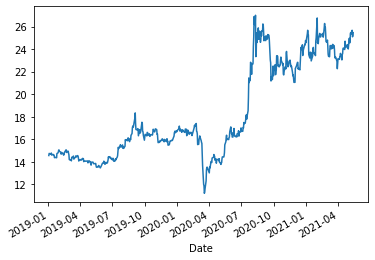

In [373]:
silver['Close'].plot()

# Bonds

In [33]:
investpy.bonds.get_bonds_list(country='brazil')

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [329]:
investpy.bonds.get_bond_recent_data('1089866')

RuntimeError: ERR#0068: bond 1089866 not found, check if it is correct.

In [41]:
search_results = investpy.search_quotes(text='tesouro',
                                        products=['bonds'],
                                        countries=['brazil'],
                                        n_results=50)

In [42]:
for search_result in search_results[6:7]:
    print(search_result)
    tesouro = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='14/05/2021')

{"id_": 1089897, "name": "Tesouro IPCA + NTNB 6 15-May-2045", "symbol": "NTB051545=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2045", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [43]:
tesouro.head()

Open      High       Low     Close
Date                                              
2019-01-02  3651.118  3651.118  3651.118  3651.118
2019-01-03  3687.068  3687.068  3687.068  3687.068
2019-01-04  3718.380  3718.380  3718.380  3718.380
2019-01-07  3719.077  3719.077  3719.077  3719.077
2019-01-08  3735.218  3735.218  3735.218  3735.218

<AxesSubplot:xlabel='Date'>

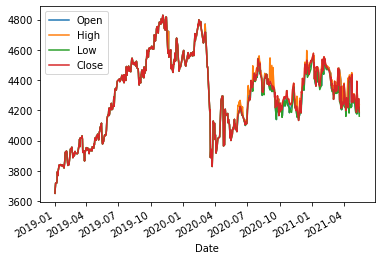

In [44]:
tesouro.plot()

# Quandl

Link: https://blog.quandl.com/api-for-commodity-data

Utilização de Quandl para commodities: https://pt.stackoverflow.com/questions/210067/api-python-para-obter-valores-real-time-de-commodities